In [130]:
import sys
sys.path.append("C:\\WorkingGround\\02450 Introduction to Machine Learning and Data Mining E17\\02450Toolbox_Python\Tools")
sys.path

['',
 'C:\\WorkingGround\\Anaconda\\envs\\ipykernel_py3\\python36.zip',
 'C:\\WorkingGround\\Anaconda\\envs\\ipykernel_py3\\DLLs',
 'C:\\WorkingGround\\Anaconda\\envs\\ipykernel_py3\\lib',
 'C:\\WorkingGround\\Anaconda\\envs\\ipykernel_py3',
 'C:\\WorkingGround\\Anaconda\\envs\\ipykernel_py3\\lib\\site-packages',
 'C:\\WorkingGround\\Anaconda\\envs\\ipykernel_py3\\lib\\site-packages\\cycler-0.10.0-py3.6.egg',
 'C:\\WorkingGround\\Anaconda\\envs\\ipykernel_py3\\lib\\site-packages\\IPython\\extensions',
 'C:\\Users\\houxi\\.ipython',
 'C:\\WorkingGround\\02450 Introduction to Machine Learning and Data Mining E17\\02450Toolbox_Python\\Tools',
 'C:\\WorkingGround\\02450 Introduction to Machine Learning and Data Mining E17\\02450Toolbox_Python\\Tools',
 'C:\\WorkingGround\\02450 Introduction to Machine Learning and Data Mining E17\\02450Toolbox_Python\\Tools',
 'C:\\WorkingGround\\02450 Introduction to Machine Learning and Data Mining E17\\02450Toolbox_Python\\Tools',
 'C:\\WorkingGround\\0

In [131]:
import sqlite3
import pandas as pd
from sklearn import tree
from sklearn import metrics
from sklearn.cross_validation import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
from sklearn.mixture import GMM
from sklearn.mixture import GaussianMixture
from sklearn import model_selection
from sklearn import decomposition

from toolbox_02450 import clusterplot

from scipy import stats

from matplotlib.pyplot import figure, plot, legend, xlabel, show,annotate
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.graph_objs as go
%matplotlib inline

In [132]:
#data = np.loadtxt('dataset.csv', skiprows=1, delimiter=',')
df_match = pd.read_csv('dataset.csv')
print ("All columns ", df_match.columns.values)

All columns  ['stage' 'home_team_goal' 'away_team_goal' 'possession_home' 'B365H'
 'B365D' 'B365A' 'BWH' 'BWD' 'BWA' 'IWH' 'IWD' 'IWA' 'LBH' 'LBD' 'LBA'
 'WHH' 'WHD' 'WHA' 'VCH' 'VCD' 'VCA' 'team_fifa_api_id_home'
 'buildUpPlaySpeed_home' 'buildUpPlayDribbling_home'
 'buildUpPlayPassing_home' 'buildUpPlayPositioningClass_home_isOrganised'
 'chanceCreationPassing_home' 'chanceCreationCrossing_home'
 'chanceCreationShooting_home'
 'chanceCreationPositioningClass_home_isOrganised' 'defencePressure_home'
 'defenceAggression_home' 'defenceTeamWidth_home' 'team_fifa_api_id_away'
 'buildUpPlaySpeed_away' 'buildUpPlayDribbling_away'
 'buildUpPlayPassing_away' 'buildUpPlayPositioningClass_away_isOrganised'
 'chanceCreationPassing_away' 'chanceCreationCrossing_away'
 'chanceCreationShooting_away'
 'chanceCreationPositioningClass_away_isOrganised' 'defencePressure_away'
 'defenceAggression_away' 'defenceTeamWidth_away' 'corner_home'
 'corner_away' 'cross_home' 'cross_away' 'throwin_home' 'throwin

In [133]:
home_wins = np.array((df_match['home_team_goal'] > df_match['away_team_goal']).tolist())
draws = np.array((df_match['home_team_goal'] == df_match['away_team_goal']).tolist())
match_results=list()
match_results_dict=dict()
for i ,match in enumerate(home_wins):
    if match:
        match_results.append(0)   ## home team win 
    elif draws[i]:
        match_results.append(1)   ## draw 
    else:
        match_results.append(2)  ## home team lose 

match_results_dict[0]='Home'
match_results_dict[1]='Draw'
match_results_dict[2]='Away'
df_match['Result']=match_results

In [134]:
pregame_features = ['B365H', 'B365D', 'B365A', 'BWH', 'BWD', 'BWA', 'IWH', 'IWD',
                    'IWA', 'LBH', 'LBD', 'LBA', 'WHH', 'WHD', 'WHA', 'VCH', 'VCD', 'VCA', 'buildUpPlaySpeed_home',
                    'buildUpPlayDribbling_home', 'buildUpPlayPassing_home',
                    'buildUpPlayPositioningClass_home_isOrganised', 'chanceCreationPassing_home',
                    'chanceCreationCrossing_home', 'chanceCreationShooting_home',
                    'chanceCreationPositioningClass_home_isOrganised', 'defencePressure_home', 
                    'defenceAggression_home', 'defenceTeamWidth_home', 'buildUpPlaySpeed_away',
                    'buildUpPlayDribbling_away', 'buildUpPlayPassing_away', 
                    'buildUpPlayPositioningClass_away_isOrganised', 'chanceCreationPassing_away',
                    'chanceCreationCrossing_away', 'chanceCreationShooting_away', 
                    'chanceCreationPositioningClass_away_isOrganised', 'defencePressure_away',
                    'defenceAggression_away', 'defenceTeamWidth_away']


postgame_features = ['possession_home', 'corner_home', 
                    'corner_away', 'cross_home', 'cross_away', 'throwin_home', 'throwin_away',
                    'shoton_home', 'shoton_away', 'shotoff_home', 'shotoff_away', 'foulcommit_home', 
                    'foulcommit_away', 'ycard_home', 'ycard_away', 'rcard_home', 'rcard_away']

In [135]:
X=df_match[postgame_features].as_matrix()

y=df_match['Result'].as_matrix()
print ("Using in game statistics to cluster match results ")

Using in game statistics to cluster match results 


In [136]:
X_st=(X - X.mean()) / X.std()

### 1. Cluster Data by GMM and use cross-validation to estimate the number of components in the GMM. Interpret the extracted cluster centers

In [137]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_st)
##Fit in game observations to 2D for visualization
X_pcaed = pca.transform(X_st)

d = {'PC1': X_pcaed[:,0], 'PC2': X_pcaed[:,1], 'Result':df_match['Result'].values}
df_pcaed=pd.DataFrame(data=d)

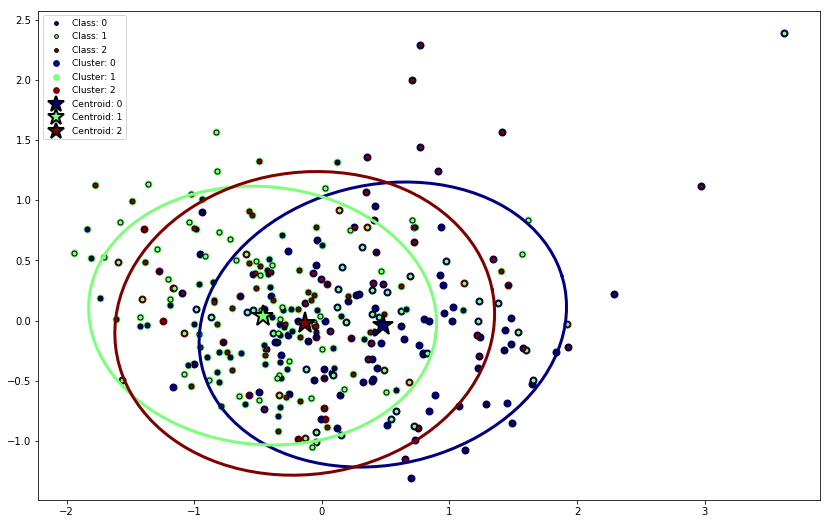

39.1558712913


In [138]:
N, M = X_st.shape
# Number of clusters
K = 3
cov_type = 'diag'       
# type of covariance, you can try out 'diag' as well
reps = 1                
# number of fits with different initalizations, best result will be kept
# Fit Gaussian mixture model
gmm = GaussianMixture(n_components=K, covariance_type=cov_type, n_init=reps).fit(X_st)
cls = gmm.predict(X_st)    
df_pcaed['CLUSTERPOST']=cls
# extract cluster labels
cds = gmm.means_      
cds = pca.transform(cds)
# extract cluster centroids (means of gaussians)
covs = gmm.covariances_

pca_covs_list=list()
for label in sorted(df_pcaed.CLUSTERPOST.unique()):
    two_pcs_covs=np.cov(df_pcaed[df_pcaed['CLUSTERPOST']==label][['PC1','PC2']].as_matrix().T)
    pca_covs_list.append(two_pcs_covs)
    
covs=np.array(pca_covs_list)


# Plot results:
figure(figsize=(14,9))
df_test=df_pcaed.sample(n=300)
clusterplot(df_test[['PC1','PC2']], clusterid=df_test['CLUSTERPOST'], centroids=cds, y=df_test['Result'], covars=covs)
show()
print (np.mean(df_pcaed['CLUSTERPOST'] == df_pcaed['Result']) * 100)

In [139]:
X=df_match[pregame_features].as_matrix()

y=df_match['Result'].as_matrix()
print ("Using pre game statistics to cluster match results ")

Using pre game statistics to cluster match results 


In [140]:
X_st = (X - X.mean()) / X.std()

In [141]:
pca = decomposition.PCA(n_components=2)
pca.fit(X_st)
##Fit in game observations to 2D for visualization
X_pcaed = pca.transform(X_st)

d = {'PC1': X_pcaed[:,0], 'PC2': X_pcaed[:,1], 'Result':df_match['Result'].values}
df_pcaed=pd.DataFrame(data=d)

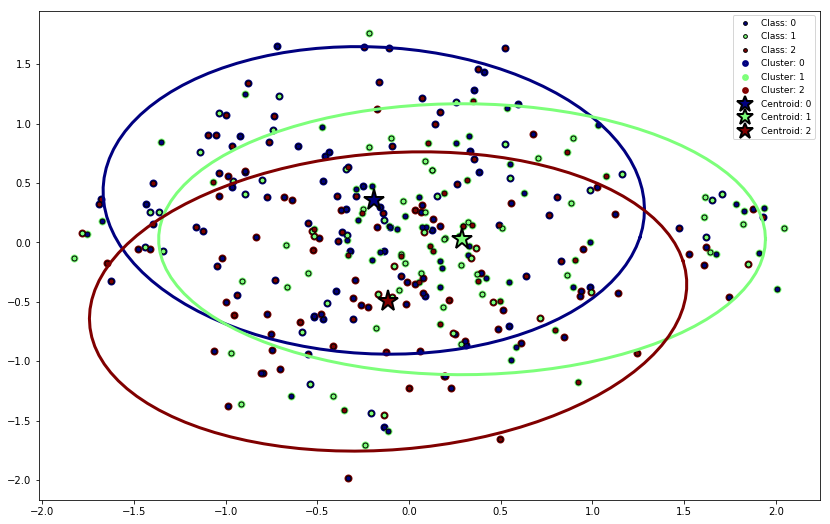

24.8641872127


In [142]:
N, M = X_st.shape
# Number of clusters
K = 3
cov_type = 'diag'       
# type of covariance, you can try out 'diag' as well
reps = 1                
# number of fits with different initalizations, best result will be kept
# Fit Gaussian mixture model
gmm = GaussianMixture(n_components=K, covariance_type=cov_type, n_init=reps).fit(X_st)
cls = gmm.predict(X_st)    
df_pcaed['CLUSTERPRE']=cls
# extract cluster labels
cds = gmm.means_      
cds = pca.transform(cds)
# extract cluster centroids (means of gaussians)
covs = gmm.covariances_

pca_covs_list=list()
for label in sorted(df_pcaed.CLUSTERPRE.unique()):
    two_pcs_covs=np.cov(df_pcaed[df_pcaed['CLUSTERPRE']==label][['PC1','PC2']].as_matrix().T)
    pca_covs_list.append(two_pcs_covs)
    
covs=np.array(pca_covs_list)


# Plot results:
figure(figsize=(14,9))
df_test=df_pcaed.sample(n=300)
clusterplot(df_test[['PC1','PC2']], clusterid=df_test['CLUSTERPRE'], centroids=cds, y=df_test['Result'], covars=covs)
show()
print (np.mean(df_pcaed['CLUSTERPRE'] == df_pcaed['Result']) * 100)